In [478]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt

### <center>GENERATE MARKDOWN TEXT

In [479]:
%run ../helper/generate_markdown.ipynb import generate_markdown_text
generate_markdown_text('i.Split-apply-combine.')

'i. [Split-apply-combine.](#-i.Split-apply-combine.)'

# GroupBy Operations on US Congress Dataset
1. [Find columns that are composed of missing values only.](#-1.Find-columns-that-are-composed-of-missing-values-only.)
2. [Compare the memory usage of each object column.](#-2.Compare-the-memory-usage-of-each-object-column.)
3. [Create a new df and run dtype transformation.](#-3.Create-a-new-df-and-run-dtype-transformation.)
4. [Display the count of Congressional members on a state-by-state basis.](#-4.Display-the-count-of-Congressional-members-on-a-state-by-state-basis.)
5. [Display the count of Congressional members grouped by their gender on a state-by-state basis.](#-5.Display-the-count-of-Congressional-members-grouped-by-their-gender-on-a-state-by-state-basis.)
    - i. [Compare column count in Pandas vs SQL.](#-i.Compare-column-count-in-Pandas-vs-SQL.)
    - ii. [Emulate SQL output by changing as_index default value.](#-ii.Emulate-SQL-output-by-changing-as_index-default-value.)
    - iii. [Compare ordering of results.](#-iii.Compare-ordering-of-results.)
6. [Explore DataFrameGroupBy Object.](#-6.Explore-DataFrameGroupBy.)
    - i. [Split-apply-combine.](#-i.Split-apply-combine.)

In [480]:
df = pd.read_csv('../data/groupby-data/legislators-historical.csv')

df.shape

(11975, 34)

In [481]:
df.columns

Index(['last_name', 'first_name', 'middle_name', 'suffix', 'nickname',
       'full_name', 'birthday', 'gender', 'type', 'state', 'district',
       'senate_class', 'party', 'url', 'address', 'phone', 'contact_form',
       'rss_url', 'twitter', 'facebook', 'youtube', 'youtube_id',
       'bioguide_id', 'thomas_id', 'opensecrets_id', 'lis_id', 'fec_ids',
       'cspan_id', 'govtrack_id', 'votesmart_id', 'ballotpedia_id',
       'washington_post_id', 'icpsr_id', 'wikipedia_id'],
      dtype='object')

In [482]:
df.head()

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,district,senate_class,party,url,address,phone,contact_form,rss_url,twitter,facebook,youtube,youtube_id,bioguide_id,thomas_id,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Bassett,Richard,NaN,NaN,NaN,NaN,1745-04-02,M,sen,DE,NaN,2.0,Anti-Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B000226,NaN,NaN,NaN,NaN,NaN,401222,NaN,NaN,NaN,507.0,Richard Bassett (politician)
1,Bland,Theodorick,NaN,NaN,NaN,NaN,1742-03-21,M,rep,VA,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B000546,NaN,NaN,NaN,NaN,NaN,401521,NaN,NaN,NaN,786.0,Theodorick Bland (congressman)
2,Burke,Aedanus,NaN,NaN,NaN,NaN,1743-06-16,M,rep,SC,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B001086,NaN,NaN,NaN,NaN,NaN,402032,NaN,NaN,NaN,1260.0,Aedanus Burke
3,Carroll,Daniel,NaN,NaN,NaN,NaN,1730-07-22,M,rep,MD,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C000187,NaN,NaN,NaN,NaN,NaN,402334,NaN,NaN,NaN,1538.0,Daniel Carroll
4,Clymer,George,NaN,NaN,NaN,NaN,1739-03-16,M,rep,PA,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C000538,NaN,NaN,NaN,NaN,NaN,402671,NaN,NaN,NaN,1859.0,George Clymer


## 1.Find columns that are composed of missing values only.

### Using `isnull().all()`

In [483]:

df.isnull().all()

last_name             False
first_name            False
middle_name           False
suffix                False
nickname              False
full_name             False
birthday              False
gender                False
type                  False
state                 False
district              False
senate_class          False
party                 False
url                   False
address               False
phone                 False
contact_form          False
rss_url               False
twitter                True
facebook               True
youtube                True
youtube_id             True
bioguide_id           False
thomas_id             False
opensecrets_id        False
lis_id                False
fec_ids               False
cspan_id              False
govtrack_id           False
votesmart_id          False
ballotpedia_id        False
washington_post_id     True
icpsr_id              False
wikipedia_id          False
dtype: bool

In [484]:
null_col_list = df.columns[df.isnull().all()]
null_col_list

Index(['twitter', 'facebook', 'youtube', 'youtube_id', 'washington_post_id'], dtype='object')

In [485]:
null_col_list = df.columns[df.isnull().all()].to_list()
null_col_list

['twitter', 'facebook', 'youtube', 'youtube_id', 'washington_post_id']

In [486]:
df.drop(null_col_list, axis=1).columns

Index(['last_name', 'first_name', 'middle_name', 'suffix', 'nickname',
       'full_name', 'birthday', 'gender', 'type', 'state', 'district',
       'senate_class', 'party', 'url', 'address', 'phone', 'contact_form',
       'rss_url', 'bioguide_id', 'thomas_id', 'opensecrets_id', 'lis_id',
       'fec_ids', 'cspan_id', 'govtrack_id', 'votesmart_id', 'ballotpedia_id',
       'icpsr_id', 'wikipedia_id'],
      dtype='object')

### Using `dropna(how='all')`.

In [487]:
df.dropna(how='all', axis=1).columns

Index(['last_name', 'first_name', 'middle_name', 'suffix', 'nickname',
       'full_name', 'birthday', 'gender', 'type', 'state', 'district',
       'senate_class', 'party', 'url', 'address', 'phone', 'contact_form',
       'rss_url', 'bioguide_id', 'thomas_id', 'opensecrets_id', 'lis_id',
       'fec_ids', 'cspan_id', 'govtrack_id', 'votesmart_id', 'ballotpedia_id',
       'icpsr_id', 'wikipedia_id'],
      dtype='object')

In [488]:
df = df.dropna(how='all', axis=1)

df.shape

(11975, 29)

In [489]:
df.dtypes

last_name          object
first_name         object
middle_name        object
suffix             object
nickname           object
full_name          object
birthday           object
gender             object
type               object
state              object
district          float64
senate_class      float64
party              object
url                object
address            object
phone              object
contact_form       object
rss_url            object
bioguide_id        object
thomas_id         float64
opensecrets_id     object
lis_id             object
fec_ids            object
cspan_id          float64
govtrack_id         int64
votesmart_id      float64
ballotpedia_id     object
icpsr_id          float64
wikipedia_id       object
dtype: object

In [490]:
df.isnull().sum()

last_name             0
first_name            0
middle_name        3617
suffix            11553
nickname          11748
full_name         11634
birthday            553
gender                0
type                  0
state                 0
district           1829
senate_class      10146
party               234
url               11329
address           11626
phone             11630
contact_form      11754
rss_url           11772
bioguide_id           0
thomas_id         10175
opensecrets_id    11310
lis_id            11784
fec_ids           11437
cspan_id          11560
govtrack_id           0
votesmart_id      11417
ballotpedia_id    11784
icpsr_id            212
wikipedia_id          2
dtype: int64

[BACK TO TOP][def]

[def]:#-GroupBy-Operations-on-US-Congress-Dataset 

## 2.Compare the memory usage of each object column.

In [491]:
# create a list of columns of object type
df_cols = [col for col in df.columns.to_list() if df[col].dtype == 'object'] 
df_cols

['last_name',
 'first_name',
 'middle_name',
 'suffix',
 'nickname',
 'full_name',
 'birthday',
 'gender',
 'type',
 'state',
 'party',
 'url',
 'address',
 'phone',
 'contact_form',
 'rss_url',
 'bioguide_id',
 'opensecrets_id',
 'lis_id',
 'fec_ids',
 'ballotpedia_id',
 'wikipedia_id']

In [492]:
def check_memory_usage(df, col_type='object'):
    """
    Calculates the memory usage of each column in the specified DataFrame `df`,
    after converting the column to the specified data type `col_type`.

    Args:
        df (pandas.DataFrame): The DataFrame for which to calculate memory usage.
        col_type (str, optional): The data type to which each column should be
            converted before calculating memory usage. Defaults to 'object'.

    Returns:
        dict: A dictionary containing the memory usage of each column in bytes,
        after conversion to the specified data type. The dictionary also includes
        the total memory usage of the DataFrame in bytes.

    """
    memory_dict = {}
    for col in df.columns:
        memory_dict[col] = df[col].astype(col_type).memory_usage(deep=True, index=False)
    memory_dict['total_memory_usage'] = sum(memory_dict.values())
    return memory_dict




def memory_usage_difference(df, col_type1='object', col_type2='category'):
    """
    Calculates the difference in memory usage between two different column data types for a given DataFrame.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame for which to calculate the memory usage difference.
        col_type1 (str, optional): The first column data type. Defaults to 'object'.
        col_type2 (str, optional): The second column data type. Defaults to 'category'.
    
    Returns:
        dict: A dictionary containing the memory usage difference (in bytes) for each column and the total difference.
    """
    # Get memory usage for both column data types
    memory_usage1 = check_memory_usage(df, col_type=col_type1)
    memory_usage2 = check_memory_usage(df, col_type=col_type2)

    # Calculate the difference in memory usage
    diff_dict = {}
    for col in df.columns:
        diff_dict[col] = memory_usage1[col] - memory_usage2[col]

    # Calculate total difference
    total_diff = sum(diff_dict.values())

    # Create output dictionary
    output_dict = {
        'column_diff': diff_dict,
        'total_diff': total_diff
    }

    return output_dict

memory_usage_difference(df)

{'column_diff': {'last_name': 255844,
  'first_name': 598233,
  'middle_name': 368248,
  'suffix': 382561,
  'nickname': 365930,
  'full_name': 340042,
  'birthday': -210990,
  'gender': 682351,
  'type': 706297,
  'state': 689024,
  'district': 368697,
  'senate_class': 371093,
  'party': 763190,
  'url': 322113,
  'address': 340537,
  'phone': 343778,
  'contact_form': 344496,
  'rss_url': 344570,
  'bioguide_id': -288182,
  'thomas_id': 278762,
  'opensecrets_id': 321418,
  'lis_id': 348970,
  'fec_ids': 325482,
  'cspan_id': 339378,
  'govtrack_id': 47118,
  'votesmart_id': 338234,
  'ballotpedia_id': 348970,
  'icpsr_id': 914,
  'wikipedia_id': -288118},
 'total_diff': 9148960}

### More readable version including rounded percentage usage values.

In [493]:
def memory_usage_difference(df, col_type1='object', col_type2='category'):
    """
    Calculates the difference in memory usage between two different column data types for a given DataFrame.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame for which to calculate the memory usage difference.
        col_type1 (str, optional): The first column data type. Defaults to 'object'.
        col_type2 (str, optional): The second column data type. Defaults to 'category'.
    
    Returns:
        dict: A dictionary containing the memory usage difference (in bytes) for each column and the total difference.
    """
    # Get memory usage for both column data types
    memory_usage1 = check_memory_usage(df, col_type=col_type1)
    memory_usage2 = check_memory_usage(df, col_type=col_type2)

    # Calculate the difference in memory usage
    diff_dict = {}
    for col in df.columns:
        diff = memory_usage1[col] - memory_usage2[col]
        diff_pct = 100 * diff / memory_usage1[col]
        diff_dict[col] = {
            'diff_bytes': diff,
            'diff_percent': f"{round(diff_pct)}%"
        }

    # Calculate total difference
    total_diff_bytes = sum(diff_dict[col]['diff_bytes'] for col in df.columns)
    total_diff_pct = 100 * total_diff_bytes / sum(memory_usage1.values())

    # Create output dictionary
    output_dict = {
        'column_diff': diff_dict,
        'total_diff': {
            'diff_bytes': total_diff_bytes,
            'diff_percent': f"{round(total_diff_pct)}%"
        }
    }

    return output_dict

In [494]:
output = memory_usage_difference(df)
output

{'column_diff': {'last_name': {'diff_bytes': 256775, 'diff_percent': '34%'},
  'first_name': {'diff_bytes': 598340, 'diff_percent': '79%'},
  'middle_name': {'diff_bytes': 368248, 'diff_percent': '57%'},
  'suffix': {'diff_bytes': 382561, 'diff_percent': '97%'},
  'nickname': {'diff_bytes': 365930, 'diff_percent': '94%'},
  'full_name': {'diff_bytes': 340042, 'diff_percent': '86%'},
  'birthday': {'diff_bytes': -210990, 'diff_percent': '-27%'},
  'gender': {'diff_bytes': 682351, 'diff_percent': '98%'},
  'type': {'diff_bytes': 706297, 'diff_percent': '98%'},
  'state': {'diff_bytes': 689024, 'diff_percent': '98%'},
  'district': {'diff_bytes': 368697, 'diff_percent': '96%'},
  'senate_class': {'diff_bytes': 371093, 'diff_percent': '97%'},
  'party': {'diff_bytes': 763190, 'diff_percent': '98%'},
  'url': {'diff_bytes': 322113, 'diff_percent': '77%'},
  'address': {'diff_bytes': 340537, 'diff_percent': '83%'},
  'phone': {'diff_bytes': 343778, 'diff_percent': '87%'},
  'contact_form': {

In [495]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

pp.pprint(output)

{   'column_diff': {   'address': {'diff_bytes': 340537, 'diff_percent': '83%'},
                       'ballotpedia_id': {   'diff_bytes': 348970,
                                             'diff_percent': '89%'},
                       'bioguide_id': {   'diff_bytes': -288182,
                                          'diff_percent': '-38%'},
                       'birthday': {   'diff_bytes': -210990,
                                       'diff_percent': '-27%'},
                       'contact_form': {   'diff_bytes': 344496,
                                           'diff_percent': '86%'},
                       'cspan_id': {   'diff_bytes': 339378,
                                       'diff_percent': '89%'},
                       'district': {   'diff_bytes': 368697,
                                       'diff_percent': '96%'},
                       'fec_ids': {'diff_bytes': 325482, 'diff_percent': '81%'},
                       'first_name': {   'diff_bytes': 598340,
 

### Image representation of the column differences.


<!-- ![alt text](../assets/pprint.png) -->

<img src="../assets/pprint.png" alt="output image" width="50%"/>



## 3.Create a new df and run dtype transformation.

In [496]:
# define dtypes, use categorical dtype

dtypes = {
    "first_name": "category",
    "last_name": "category",
    "gender": "category",
    "type": "category",
    "state": "category",
    "party": "category",
}

print(list(dtypes))

df = pd.read_csv(
    "../data/groupby-data/legislators-historical.csv",
    dtype=dtypes,
    usecols=list(dtypes) + ["birthday"], # add birthday column
    parse_dates=["birthday"]
)

# check the last 10 records
df.tail(10)

['first_name', 'last_name', 'gender', 'type', 'state', 'party']


,last_name,first_name,birthday,gender,type,state,party
11965,Lewis,Jason,1955-09-23,M,rep,MN,Republican
11966,Kihuen,Ruben,1980-04-25,M,rep,NV,Democrat
11967,Faso,John,1952-08-25,M,rep,NY,Republican
11968,Tenney,Claudia,1961-02-04,F,rep,NY,Republican
11969,Taylor,Scott,1979-06-27,M,rep,VA,Republican
11970,Garrett,Thomas,1972-03-27,M,rep,VA,Republican
11971,Handel,Karen,1962-04-18,F,rep,GA,Republican
11972,Jones,Brenda,1959-10-24,F,rep,MI,Democrat
11973,Marino,Tom,1952-08-15,M,rep,PA,Republican
11974,Jones,Walter,1943-02-10,M,rep,NC,Republican


In [497]:
df.dtypes

last_name           category
first_name          category
birthday      datetime64[ns]
gender              category
type                category
state               category
party               category
dtype: object

[BACK TO TOP][def]

[def]:#-GroupBy-Operations-on-US-Congress-Dataset 

## 4.Display the count of Congressional members on a state-by-state basis.

```sql
SELECT state, COUNT(last_name)
FROM df
GROUP BY state
ORDER BY state
```


<div align="center">
    <code>
        <pre>
            <strong>SQL QUERY: </strong>
        SELECT state, COUNT(last_name)
        FROM df
        GROUP BY state
        ORDER BY state
        </pre>
    </code>

</div>

In [498]:
df.groupby('state').last_name\
    .count() \
    .sort_index()

state
AK      16
AL     206
AR     117
AS       2
AZ      48
CA     361
CO      90
CT     240
DC       2
DE      97
DK       9
FL     155
GA     309
GU       4
HI      23
IA     202
ID      59
IL     486
IN     341
KS     141
KY     373
LA     197
MA     426
MD     305
ME     175
MI     294
MN     160
MO     333
MS     155
MT      52
NC     354
ND      44
NE     127
NH     181
NJ     359
NM      54
NV      56
NY    1461
OH     674
OK      92
OL       2
OR      89
PA    1053
PI      13
PR      19
RI     107
SC     251
SD      51
TN     299
TX     256
UT      53
VA     432
VI       4
VT     115
WA      95
WI     196
WV     120
WY      40
Name: last_name, dtype: int64

<AxesSubplot:xlabel='state'>

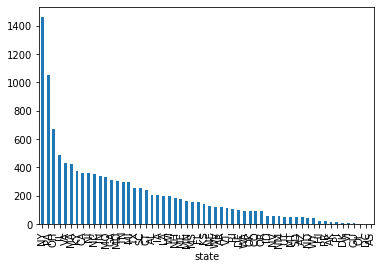

In [499]:
df.groupby('state').last_name\
    .count() \
    .sort_values(ascending=False) \
    .plot(kind='bar')

[BACK TO TOP][def]

[def]: #-GroupBy-Operations-on-US-Congress-Dataset 

### 5.Display the count of Congressional members grouped by their gender on a state-by-state basis.


<div align="center">
    <code>
        <pre>
            <strong>SQL QUERY: </strong>
            <i>
        SELECT state, gender, COUNT(last_name)
        FROM df
        GROUP BY state, gender
        ORDER BY state, gender;
        </pre>
    </code>

</div>

In [500]:
df.groupby(['state', 'gender']).last_name.count().head(10)

state  gender
AK     F           0
       M          16
AL     F           3
       M         203
AR     F           5
       M         112
AS     F           0
       M           2
AZ     F           3
       M          45
Name: last_name, dtype: int64

### i.Compare column count in Pandas vs SQL.

In [501]:
# sql query results in three columns, while the pandas result in a MultiIndex column by default
n_by_state_gender = df.groupby(['state', 'gender']).last_name.count()
type(n_by_state_gender)

pandas.core.series.Series

In [502]:
type(n_by_state_gender.index)


pandas.core.indexes.multi.MultiIndex

In [503]:
# print the first 5 index values
n_by_state_gender.index[0:5]

MultiIndex([('AK', 'F'),
            ('AK', 'M'),
            ('AL', 'F'),
            ('AL', 'M'),
            ('AR', 'F')],
           names=['state', 'gender'])

#### ii.Emulate SQL output by changing as_index default value.

In [504]:
# this will produce a DataFrame with three columns and a RangeIndex 
# instead of a Series with a MultiIndex
df.groupby(['state', 'gender'], 
           as_index=False) \
    .last_name \
    .count()

,state,gender,last_name
0,AK,F,0
1,AK,M,16
2,AL,F,3
3,AL,M,203
4,AR,F,5
...,...,...,...
111,WI,M,196
112,WV,F,1
113,WV,M,119
114,WY,F,2


### iii.Compare ordering of results.

In [505]:
# SQL requires ORDER BY for sorted results
# while Pandas groupby() sorts by default

# this will return results in an unsorted order
df.groupby(['state', 'gender'], 
           as_index=False,
           sort=False) \
        .last_name \
        .count() 

,state,gender,last_name
0,DE,M,97
1,DE,F,0
2,VA,M,428
3,VA,F,4
4,SC,M,246
...,...,...,...
111,VI,F,1
112,GU,M,3
113,GU,F,1
114,AS,M,2


[BACK TO TOP][def]

[def]: #-GroupBy-Operations-on-US-Congress-Dataset 

### 6.Explore DataFrameGroupBy Object.

In [506]:
# DataFrameGroupBy object is lazy in nature.
by_state = df.groupby('state')
by_state

### i.Split-apply-combine.

- Frequently used chain of three steps:
    - `Split` a table into groups.
    - `Apply` some operations to each of those smaller tables.
    - `Combine` the results.

In [507]:
counter = 0
for state, frame in by_state:
    print(f"First 2 entries for {state!r}")
    print('--------------------------')
    print(frame.head(2), end="\n\n")
    counter += 1
    if counter > 3:
        break

First 2 entries for 'AK'
--------------------------
     last_name first_name   birthday gender type state        party
6619    Waskey      Frank 1875-04-20      M  rep    AK     Democrat
6647      Cale     Thomas 1848-09-17      M  rep    AK  Independent

First 2 entries for 'AL'
--------------------------
    last_name first_name   birthday gender type state       party
912   Crowell       John 1780-09-18      M  rep    AL  Republican
991    Walker       John 1783-08-12      M  sen    AL  Republican

First 2 entries for 'AR'
--------------------------
     last_name first_name   birthday gender type state party
1001     Bates      James 1788-08-25      M  rep    AR   NaN
1279    Conway      Henry 1793-03-18      M  rep    AR   NaN

First 2 entries for 'AS'
--------------------------
          last_name first_name   birthday gender type state     party
10797         Sunia       Fofó 1937-03-13      M  rep    AS  Democrat
11755  Faleomavaega        Eni 1943-08-15      M  rep    AS  Dem

In [508]:
# groups method returns the index values at which the state equals to "PA"
by_state.groups['PA']

Int64Index([    4,    19,    21,    27,    38,    57,    69,    76,    84,
               88,
            ...
            11842, 11866, 11875, 11877, 11887, 11891, 11932, 11945, 11959,
            11973],
           dtype='int64', length=1053)

In [509]:
# lets verify
df.iloc[[4,19,21]]

,last_name,first_name,birthday,gender,type,state,party
4,Clymer,George,1739-03-16,M,rep,PA,NaN
19,Maclay,William,1737-07-20,M,sen,PA,Anti-Administration
21,Morris,Robert,1734-01-20,M,sen,PA,Pro-Administration


In [510]:
# as an alternative to df.loc, get_group returns the sub-table
by_state.get_group('PA').head()

,last_name,first_name,birthday,gender,type,state,party
4,Clymer,George,1739-03-16,M,rep,PA,NaN
19,Maclay,William,1737-07-20,M,sen,PA,Anti-Administration
21,Morris,Robert,1734-01-20,M,sen,PA,Pro-Administration
27,Wynkoop,Henry,1737-03-02,M,rep,PA,NaN
38,Jacobs,Israel,1726-06-09,M,rep,PA,NaN


In [511]:
# using df.loc 
df.loc[df.state == 'PA'].head()

,last_name,first_name,birthday,gender,type,state,party
4,Clymer,George,1739-03-16,M,rep,PA,NaN
19,Maclay,William,1737-07-20,M,sen,PA,Anti-Administration
21,Morris,Robert,1734-01-20,M,sen,PA,Pro-Administration
27,Wynkoop,Henry,1737-03-02,M,rep,PA,NaN
38,Jacobs,Israel,1726-06-09,M,rep,PA,NaN


- Apply step applies the same operation to every sub-table that the splitting stage produces.

In [512]:
# grab the initial U.S. state and the DataFrame with next()
state, frame = next(iter(by_state))
state

'AK'

In [513]:
frame.head()

,last_name,first_name,birthday,gender,type,state,party
6619,Waskey,Frank,1875-04-20,M,rep,AK,Democrat
6647,Cale,Thomas,1848-09-17,M,rep,AK,Independent
7442,Grigsby,George,1874-12-02,M,rep,AK,NaN
7501,Sulzer,Charles,1879-02-24,M,rep,AK,NaN
8039,Sutherland,Daniel,1869-04-17,M,rep,AK,Republican


In [514]:
frame.last_name.count()

16

[BACK TO TOP][def]

[def]: #-GroupBy-Operations-on-US-Congress-Dataset 